<a href="https://colab.research.google.com/github/IreneKibet/CIS-635-Term-Project/blob/main/Irene_Kibet_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

## Model Selection and Evaluation on the Iris Dataset

Details of this assignment can be found [here](https://yong-zhuang.github.io/gvsu-cis635/assignment3.html)

### Question 1
### Loading and transforming the Iris dataset

In [ ]:
# Loading the Iris Datasetd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

#Checking the dataset type
print(type(iris))


<class 'sklearn.utils._bunch.Bunch'>


In [ ]:
#Storing the feature matrix in X and the target vector in y
X = iris.data
y = iris.target

# Checking the shapes of the feature matrix and the target
print(X.shape)
print(y.shape)


(150, 4)
(150,)


In [ ]:
print(iris.feature_names)
print(iris.target_names)
print(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Question 2
#### Exploratory Data Analysis

In [ ]:
# Converting the Iris data into a DataFrame
import pandas as pd
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Assigning the column name to the target
iris_df['species'] = iris.target_names[iris.target]

# Checking the number of samples for each species
species_counts = iris_df['species'].value_counts()
print("The number of samples in each species are:")
print(species_counts)
print("\nAll three classes have the same number of samples.")

# Checking class balance
class_ratio_percent = iris_df['species'].value_counts(normalize=True) * 100
print('\nClass Ratio (in percentages):')
for class_label, percentage in class_ratio_percent.items():
    print(f"{class_label}: {percentage:.2f}%")


The number of samples in each species are:
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

All three classes have the same number of samples.

Class Ratio (in percentages):
setosa: 33.33%
versicolor: 33.33%
virginica: 33.33%


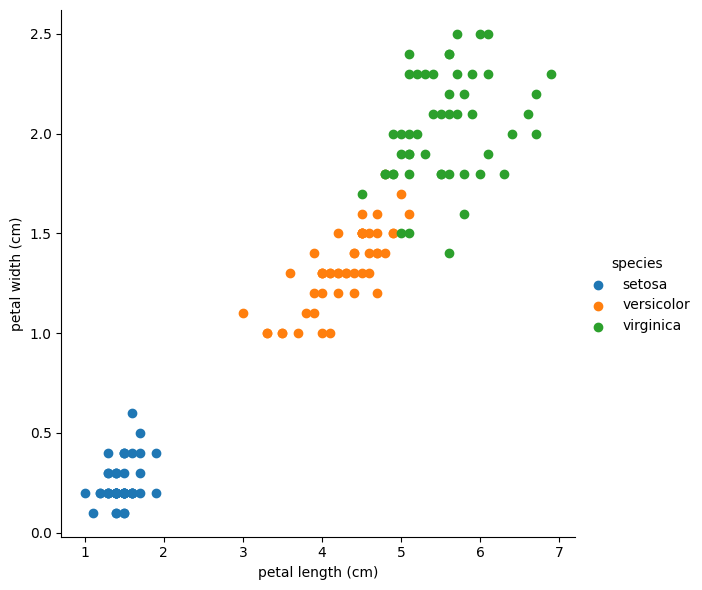

In [ ]:
#Importing packages for visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt

sns.FacetGrid(iris_df, hue="species", height=6).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

# Show the plot
plt.show()


### Question 3
### Data Normalization

In [ ]:
# Checking the summary statistics of the features to determine whether normalization is necessary
feature_summary = iris_df.describe()

# Display the feature statistics
print("Feature summary statistics:")
print(feature_summary)

# Check the scale of the features
scale_range = feature_summary.loc['max'] - feature_summary.loc['min']

print("\nRange between smallest and larget value of each feature")
print(scale_range)

Feature summary statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Range between smallest and larget value of each feature
sepal length (cm)    3.6
sepal width (cm)     2.4
petal length (cm)    5.9
petal width (cm)    

Based on the scale range of the sample values, there is a big difference in the values of the feature "petal length" that necessitates normalization to ensure that all features contribute equally and to prevent features with larger scales from having a disproportionate impact on the results of the models.

---



In [ ]:
#Scaling the features
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

#Initializing the MinMaxScaler
scaler = preprocessing.MinMaxScaler()

# Normalizing the scale of the feature matrix
X_scaled = scaler.fit_transform(X)


### Question 4
### Stratified K-Fold Cross-Validation Framework

In [ ]:
# Splitting the data for cross validation

from sklearn.model_selection import StratifiedKFold
# Creating StratifiedKFold object and initializing Stratified K-Fold with k=3
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=100)

for i, (train_index, test_index) in enumerate(skf.split(X_scaled, y)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  \nTest:  index={test_index}")


Fold 0:
  Train: index=[  1   2   3   4   5   7   8   9  12  13  14  15  16  17  18  20  21  22
  23  24  29  30  31  32  35  36  37  39  41  42  45  46  48  52  53  54
  56  57  58  61  63  64  66  67  68  70  71  74  76  77  78  80  81  82
  83  85  86  89  91  93  94  95  96  97  98  99 100 102 103 105 108 109
 111 114 115 116 117 118 119 120 121 123 126 127 128 129 131 132 133 135
 136 138 139 140 142 143 145 146 147 148]
  
Test:  index=[  0   6  10  11  19  25  26  27  28  33  34  38  40  43  44  47  49  50
  51  55  59  60  62  65  69  72  73  75  79  84  87  88  90  92 101 104
 106 107 110 112 113 122 124 125 130 134 137 141 144 149]
Fold 1:
  Train: index=[  0   1   2   4   5   6   9  10  11  13  14  17  19  20  25  26  27  28
  30  33  34  35  36  37  38  39  40  41  43  44  46  47  49  50  51  54
  55  56  57  59  60  62  63  65  66  69  72  73  74  75  77  78  79  82
  84  85  87  88  90  91  92  94  95  96  97  98  99 101 102 103 104 105
 106 107 110 111 112 113 114 116 12

### Question 5, 6 & 7
#### Fitting the data for classification and comparing the performance of the various classification models.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importing the required packages for classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score

# Creating a list to store all the classifiers for the models to be used for classification.
classifiers = [
    ("K-Nearest Neighbors Classifier", KNeighborsClassifier()),
    ("Decision Tree Classifier", DecisionTreeClassifier(random_state=68)),
    ("Random Forest Classifier", RandomForestClassifier(n_estimators=100, random_state=68)),
    ("AdaBoost Classifier", AdaBoostClassifier(n_estimators=50, random_state=68)),
    ("Naive Bayes Classifier", GaussianNB())
]

# Initiating the cross-validation testing metrics that we will use
performance_metrics = ['roc_auc', 'f1']

# We iterate through each one of the classifiers and check its performance score
for classifier_name, classifier in classifiers:
    print(f"\n{classifier_name}")
    for metric in performance_metrics:
        score = cross_val_score(classifier, X_scaled, y, cv=skf)
        mean_score = score.mean()
        std_score = score.std()
        print(f"{metric.upper()}: {mean_score:.3f} +/- {std_score:.3f}")


K-Nearest Neighbors Classifier
ROC_AUC: 0.987 +/- 0.009
F1: 0.987 +/- 0.009

Decision Tree Classifier
ROC_AUC: 0.960 +/- 0.016
F1: 0.960 +/- 0.016

Random Forest Classifier
ROC_AUC: 0.967 +/- 0.019
F1: 0.967 +/- 0.019

AdaBoost Classifier
ROC_AUC: 0.953 +/- 0.009
F1: 0.953 +/- 0.009

Naive Bayes Classifier
ROC_AUC: 0.953 +/- 0.025
F1: 0.953 +/- 0.025


### Question 8
#### Model Evaluation
From the scores displayed above:

*   K-Nearest Neighbors (KNN) has the highest mean scores for both ROC-AUC and F1 Score, indicating strong performance.
* Decision Tree and Random Forest also perform well but have slightly lower mean scores than KNN.
*   AdaBoost and Naive Bayes have lower mean scores compared to the other models.

Based on the performance scores, the K-Nearest Neighbors (KNN) classifier appears to be the best-performing model for this dataset. It consistently achieves the highest mean scores for both ROC-AUC and F1 Score, suggesting robust performance in terms of both discrimination and precision-recall characteristics. KNN provides the most accurate results for our classification problem.

In conclusion, we can achieve improved accuracy for some of these classification models with hyperparameter tuning and better normalization techniques.